### Tree
- as in 268
- root is a node has 0 or more subtrees
    - definition is recursive, each lower node can be the root of a subtree
- O(log(n)) with O(k) complexity
    - what the fuck does that mean
- pre order
    - parent before child
- post order
    - parent after child
- in order
    - parent between children
    - "between" makes sense for binary search trees only


In [ ]:
struct node
{
    MyObj data;
    node* firstChild;
    node* nextSibling;
}

### Complexity
- the height of the tree is O(log(n))
- Search
    - O(log(n)) worst case
        - based on tree height
        - assumes the tree is balanced
- Insert
    - O(n) worst case
    - O(log(n)) average
    
- findMin and findMax

In [ ]:
struct BinaryNode
{
    MyObj data; // compatible with comparison operators
    BinaryNode* left;
    BinaryNode* Right; 
    // dont need first and next because we know that it will only have 
    // 2 children max
}

In [ ]:
bool contains(MyObj & x, BinaryNode* t)
{
    if(t = nullptr)
    {
        return false;
    }
    else if(x == t->data)
    {
        return true;
    }
    else if(x < t->data)
    {
        return contains(x, t->left);
    }
    else if(x > t->data)
    {
        return contains(x, t->right);
    }
}

In [ ]:
// search
if(t->left != nullptr && t->right != nullptr)
{
    t->data = findMin(t->right)->data;
//     t->data = findMin(t->left)->data;
    // only one of the above is correct for the lab i guess
    return (t->data, t->right);
}
else
{
    BinaryNode*del = t;
    t = (t->left != nullptr? t->left : t->right); //replaces t->left with t->right 
}

- worst case tree
    - every node has one child
        - effectively this is a linked list

### Self Balancing Tree
- AVL type tree
    - for each node, the height of its left subtree and the height of the right subtree cannot differ by more than one
    - resulting tree is balanced within bottom 2 layers 
- Rotation
    - insert node at
        - case 1: right child of right node
        - case 2: left child of right node
        - case 3: right child of left node
        - case 4: left child of left nodes
    - for cases 1 & 4 (single rotation)
        - right or left rotation

<img src = "images/avl_right_rotation.jpg" alt="avl_right_rotation.jpg" title="Title" />

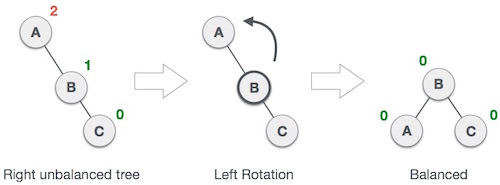

- Rotation Contd
    - for cases 2 & 4 (double rotation)
        - a combination of right and left rotations
        - right-left or left-right rotation


In [ ]:
struct AVLNode
{
    MyObj data;
    //fill in this shit I guess
}

In [ ]:
//where k2 is root and k1 is left child with some other shit below
void RotateWithLeftChild(AVLNode* k2)
{
    AVLNode* k1 = k2->left;
    k2->left = k1->right;
    k1->right = k2;
    k2->height = max(height(k2->left), height(k2->right)) + 1;
    k1->height = max(height(k1->left), height(k2)) + 1;
    k2 = k1;
}

### Splay Tree
- if accessing data, likely to also want adjacent data
- if data is deep, bring it up along with subtrees
    - makes next access faster if it is for related data
- operation cases
    - node being accessed is root 
        - no operation
    - node is child of root
        - swap node with root
    - node is not the root nor a child of the root
        - zig-zig case
            - see fugures below
        - zig-zag case
            - see fugures below
    - zig-zig: 0
    - zig-zag: -N-1
        - assume frequency of zig-zig and zag-zag are equal
        - each self balancing operation is expected to reduce tree height
            - if you run enough sb ops, the tree will become balanced or at least nearly balanced

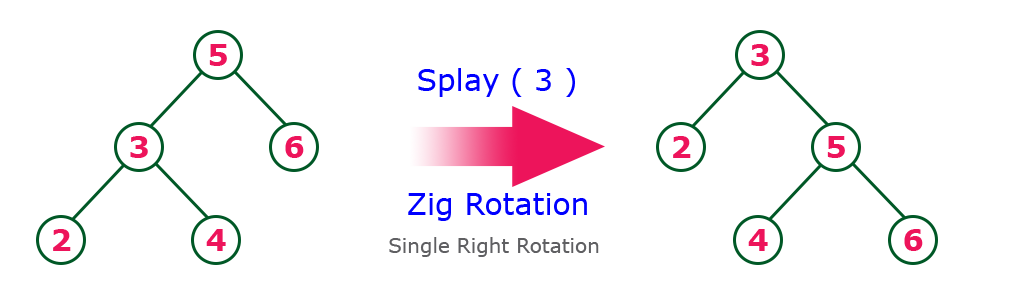

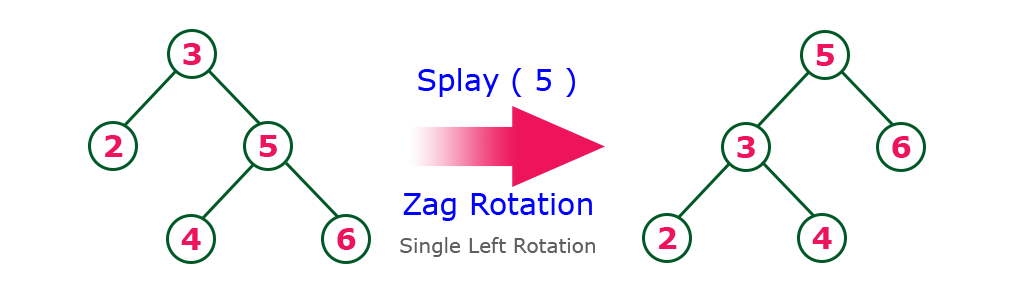

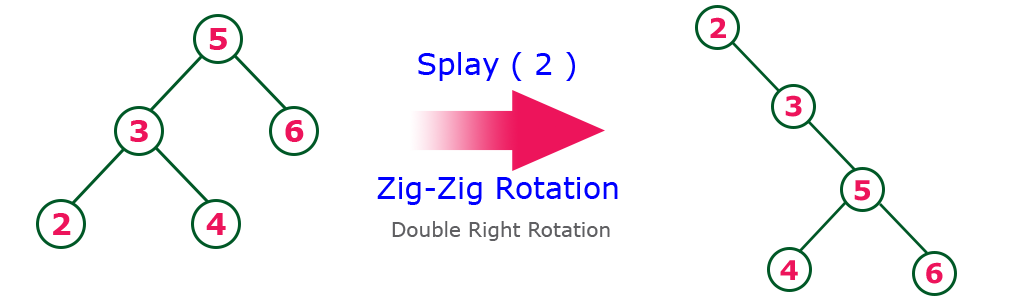

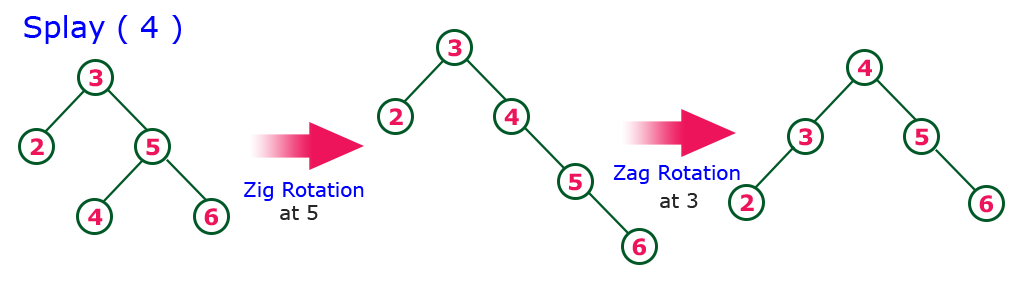
<h1><center>Zig-Zag</center></h1>


### Insertion Operation in Splay Tree
1. Check whether tree is Empty.
2. If tree is Empty then insert the newNode as Root node and exit from the operation.
3. If tree is not Empty then insert the newNode as leaf node using Binary Search tree insertion logic.
4. After insertion, Splay the newNode

### Heaps
- probably ought to add notes from 4/17
- seems to mostly be function definitions
    - uses the word "hole" a lot

- heap is a complete binary tree
    - all levels are filled except possibly the last level
    - last level is filled from left to right
    - height of a heap is O(log(n))
    - height of a complete binary tree is O(log(n))
- merging - not on final
    - merge two heaps into one
    - O(log(n))
    - merge two heaps of size n into one of size 2n
        - O(n)
- merge efficient heap


### Min Heap
- each node is smaller than its children
- root is the smallest element
- insert
    - add to the end of the heap
    - bubble up
        - swap with parent if smaller
                - repeat until parent is smaller
- deleteMin
    - swap root with last element
    - bubble down
        - swap with smaller child
            - repeat until smaller child is smaller

- find the sum of the height for all nodes
    - proof or something
        - at layer 0, 1 root, height h
        - at layer 1, 2 nodes, height h-1
        - at layer 2, 4 nodes, height h-2
        - and so on
    - sum of all nodes is 2^(h+1) - 1
    - O(1) time for average case
    - O(2log(n)) $\approx$ O(log(n))

### common problem in interviews:
- find the k+hth layer value in a set of h numbers
    - sort, then find the kth one
        - O(nlog(n)) time
        - disadvantage is that this does not account for k
    - heap, put all the numbers in, then deletemin k times
        - O(nlog(n)) time
        - O(n) for each deleteMin + O(klogn) for k deleteMin calls
        - better for small k
    - maintain a small sorted vector or array with size k
        - for each number, if it is smaller than the largest number in the array, replace it
        - keeps the largest k numbers and kicks the smallest or the prospective new element with every insert
        - O(nk) + O(klog(k)) time
                - O(nk) for the insertion into the sorted array
                - O(klog(k)) for
        - disadvantages
                - when k is large, O(nk) approaches O(n^2)
    - replace size k array with a size k min heap
        - O(k) to insert + O((n-k)log(k)) to
        - for k $\approx$ 1, O(n)
        - for k $\approx$ n, O(n)